In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import numpy as np
import pandas as pd

In [60]:
#loading data(imputed but not normalized)
def load_csv(file,describe=False):
  df=pd.read_csv(file,na_values='NA')
  df=df.drop(['id','Unnamed: 0'],axis=1)#dropping ID column

  #bacis info of dataframe
  df.info()
  if describe:
    print(df.describe(include='all'))
  
  #seperating features and label from dataframe
  X=df.drop(['loss'],axis=1)
  y=df.loc[:,'loss']>0
  if describe:
    print(X.shape,y.shape)
  return df,X,y

df,X,y=load_csv('/content/drive/MyDrive/Colab Notebooks/train_v2_preprocessed.csv', describe=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f1_x0_103 to loss
dtypes: float64(1736), int64(53)
memory usage: 1.4 GB
           f1_x0_103      f1_x0_104  ...           f773           loss
count  105471.000000  105471.000000  ...  105471.000000  105471.000000
mean        0.000284       0.000076  ...       3.273059       0.799585
std         0.016863       0.008709  ...       3.766746       4.321120
min         0.000000       0.000000  ...       0.000000       0.000000
25%         0.000000       0.000000  ...       0.740000       0.000000
50%         0.000000       0.000000  ...       1.990000       0.000000
75%         0.000000       0.000000  ...       4.440000       0.000000
max         1.000000       1.000000  ...      34.040000     100.000000

[8 rows x 1789 columns]
(105471, 1788) (105471,)


In [62]:
from sklearn.model_selection import KFold

kf=KFold(n_splits=5)
splits=list(kf.split(X))
train_index, valid_index = splits[0]
print("Training set:", train_index)
print("Validation set:",valid_index)


Training set: [ 21095  21096  21097 ... 105468 105469 105470]
Validation set: [    0     1     2 ... 21092 21093 21094]


In [63]:
X_train, X_valid= X.iloc[train_index,:], X.iloc[valid_index,:]
y_train, y_valid =y.iloc[train_index], y.iloc[valid_index]

In [64]:
from sklearn import linear_model
import time

def train_model(clf,X_train, y_train):
  start=time.time()
  clf.fit(X_train,y_train)
  end=time.time()
  fit_time=end-start
  print('Time elapsed(Training: %.4f s'%fit_time)
  print(clf)

clf=linear_model.LogisticRegression()
train_model(clf,X_train, y_train)


Time elapsed(Training: 6.2890 s
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [65]:
#evaluation function
from sklearn import metrics
import matplotlib.pyplot as plt

def evaluate (clf, X_train, y_train, X_valid, y_valid):
    # Plotting ROCAUC and PRAUC
    f, (plt1, plt2) = plt.subplots(1, 2, sharey=True, figsize=(12, 4))        
    plt1.set_title('ROC Curve')
    plt1.set_xlabel('FPR')
    plt1.set_ylabel('TPR')
    plt2.set_title('PR Curve')
    plt2.set_xlabel('Precision')
    plt2.set_ylabel('Recall')

    start = time.time()
    
    # Training set    
    y_train_predicted = clf.predict_proba(X_train)
    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predicted[:,1])
    precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_train_predicted[:,1])
    plt1.scatter(fpr, tpr, color='b')    
    plt2.scatter(precision, recall,color='b')
    print('Accuracy (Training): %f' % clf.score(X_train, y_train))
    print('ROCAUC Score (Training): %f' % metrics.roc_auc_score(y_train, y_train_predicted[:,1]))
    

    # Validation set
    y_valid_predicted = clf.predict_proba(X_valid)    
    fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_valid_predicted[:,1])
    precision, recall, thresholds = metrics.precision_recall_curve(y_valid, y_valid_predicted[:,1])
    plt1.scatter(fpr, tpr, color='r')
    plt2.scatter(precision, recall,color='r')
    print('Accuracy (Validation): %f' % clf.score(X_valid, y_valid))
    print('ROCAUC Score (Validation): %f' % metrics.roc_auc_score(y_valid, y_valid_predicted[:,1]))
  
    
    end = time.time()
    eval_time = end - start
    print('Time elapsed (Evaluation): %.4f s' % eval_time)

    plt.show()
    plt.close()

Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.500000
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.500000
Time elapsed (Evaluation): 1.4981 s


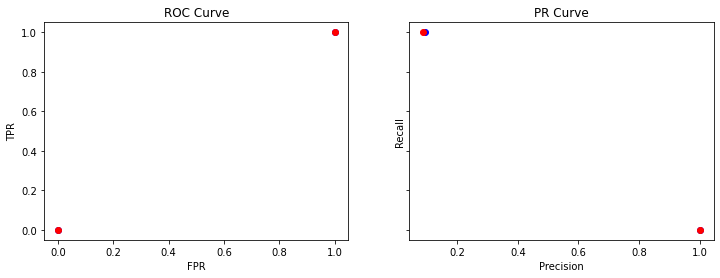

In [66]:
evaluate(clf, X_train, y_train, X_valid, y_valid)

In [67]:
# Count the number of positive and negative labels, respectively

n_pos = sum(1 if (yy == 1) else 0 for yy in y)
n_neg = sum(1 if (yy == 0) else 0 for yy in y)
print("Number of pos labels: %d" % n_pos)
print("Number of neg labels: %d" % n_neg)
print("Pos ratio = %f" % (n_pos/(n_pos + n_neg)))
print("Neg ratio = %f" % (n_neg/(n_pos + n_neg)))

Number of pos labels: 9783
Number of neg labels: 95688
Pos ratio = 0.092755
Neg ratio = 0.907245


Time elapsed(Training: 20.9547 s
LogisticRegression(C=1.0, class_weight={0: 1.0, 1: 10.0}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy (Training): 0.169397
ROCAUC Score (Training): 0.571733
Accuracy (Validation): 0.168950
ROCAUC Score (Validation): 0.553303
Time elapsed (Evaluation): 1.5026 s


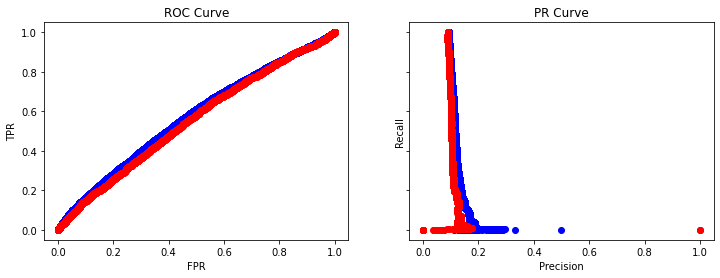

In [68]:
# Define weights for unbalanced classes
class_weight = {0: 1., 1: 10.}
clf=linear_model.LogisticRegression(class_weight=class_weight)
train_model(clf, X_train, y_train)
evaluate(clf, X_train, y_train, X_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time elapsed(Training: 32.2782 s
LogisticRegression(C=1.0, class_weight={0: 1.0, 1: 3.0}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy (Training): 0.904866
ROCAUC Score (Training): 0.433400
Accuracy (Validation): 0.907798
ROCAUC Score (Validation): 0.451103
Time elapsed (Evaluation): 1.5060 s


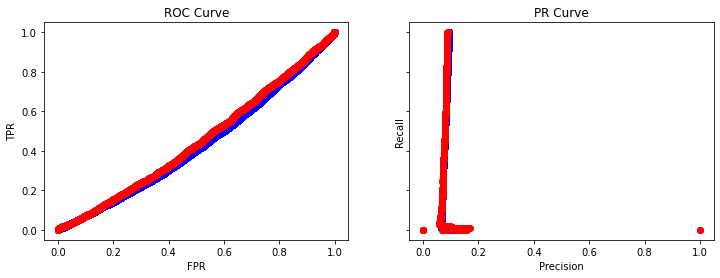

In [69]:
# Define weights for unbalanced classes

class_weight = {0: 1., 1: 3.}
clf=linear_model.LogisticRegression(class_weight=class_weight)
train_model(clf, X_train, y_train)
evaluate(clf, X_train, y_train, X_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time elapsed(Training: 5.8007 s
LogisticRegression(C=1.0, class_weight={0: 1.0, 1: 30.0}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.500000
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.500000
Time elapsed (Evaluation): 1.4358 s


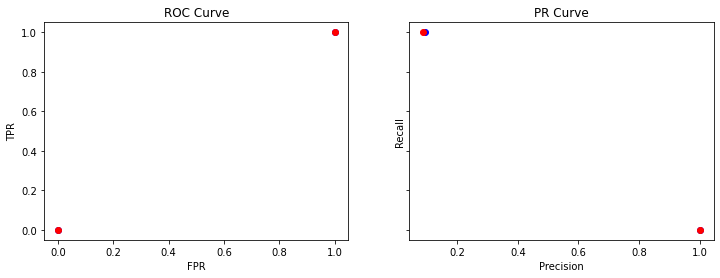

In [70]:
# Define weights for unbalanced classes

class_weight = {0: 1., 1: 30.}
clf=linear_model.LogisticRegression(class_weight=class_weight)
train_model(clf, X_train, y_train)
evaluate(clf, X_train, y_train, X_valid, y_valid)


In [71]:
# Load the training data (imputed normalized) from the CSV file

df, X, y = load_csv('/content/drive/MyDrive/Colab Notebooks/train_v2_preprocessed_normalized.csv', describe=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f3 to loss
dtypes: float64(1788), int64(1)
memory usage: 1.4 GB
                 f3            f6  ...   f778_x0_1212           loss
count  1.054710e+05  1.054710e+05  ...  105471.000000  105471.000000
mean   6.371538e-17 -2.551310e-15  ...       0.001195       0.799585
std    1.000005e+00  1.000005e+00  ...       0.034543       4.321120
min   -1.728340e+00 -1.345229e+00  ...       0.000000       0.000000
25%   -8.662007e-01 -1.029760e+00  ...       0.000000       0.000000
50%   -2.767762e-03  7.998521e-01  ...       0.000000       0.000000
75%    8.672785e-01  9.008977e-01  ...       0.000000       0.000000
max    1.734808e+00  1.137185e+00  ...       1.000000     100.000000

[8 rows x 1789 columns]
(105471, 1788) (105471,)


In [72]:
# Separate training and validation sets

def split_data(kf, X, y, describe=False):
    splits = list(kf.split(X))
    train_index, valid_index = splits[0] # Take the first split only    
    if describe:
        print("Training set: ", train_index)
        print("Validation set: ", valid_index)        
    
    X_train, X_valid = X.iloc[train_index, :], X.iloc[valid_index, :]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    return X, y, X_train, y_train, X_valid, y_valid

X, y, X_train, y_train, X_valid, y_valid = split_data(kf, X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time elapsed(Training: 25.5724 s
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy (Training): 0.906134
ROCAUC Score (Training): 0.738983
Accuracy (Validation): 0.911306
ROCAUC Score (Validation): 0.709131
Time elapsed (Evaluation): 0.7612 s


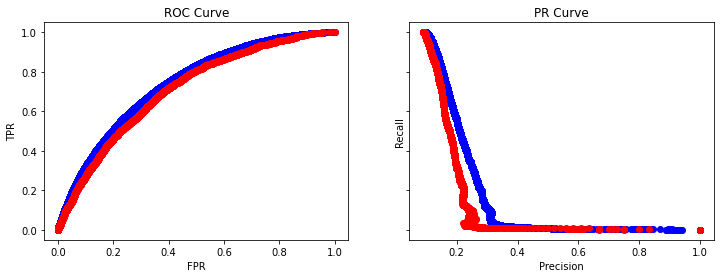

In [53]:
clf=linear_model.LogisticRegression()
train_model(clf, X_train, y_train)
evaluate(clf, X_train, y_train, X_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time elapsed(Training: 27.6070 s
LogisticRegression(C=1.0, class_weight={0: 1.0, 1: 3.0}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy (Training): 0.882668
ROCAUC Score (Training): 0.740924
Accuracy (Validation): 0.882674
ROCAUC Score (Validation): 0.710994
Time elapsed (Evaluation): 0.8302 s


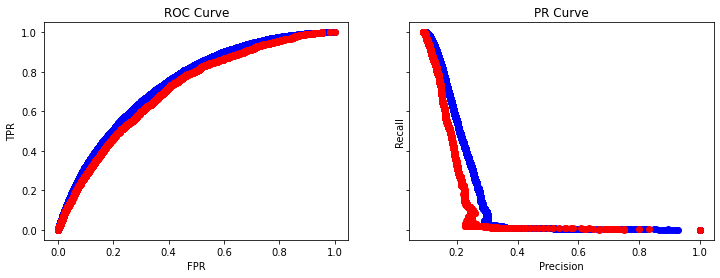

In [73]:
# Define weights for unbalanced classes

class_weight = {0: 1., 1: 3.}
clf=linear_model.LogisticRegression(class_weight=class_weight)
train_model(clf, X_train, y_train)
evaluate(clf, X_train, y_train, X_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time elapsed(Training: 28.0431 s
LogisticRegression(C=1.0, class_weight={0: 1.0, 1: 30.0}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy (Training): 0.326550
ROCAUC Score (Training): 0.740256
Accuracy (Validation): 0.323631
ROCAUC Score (Validation): 0.709334
Time elapsed (Evaluation): 0.7709 s


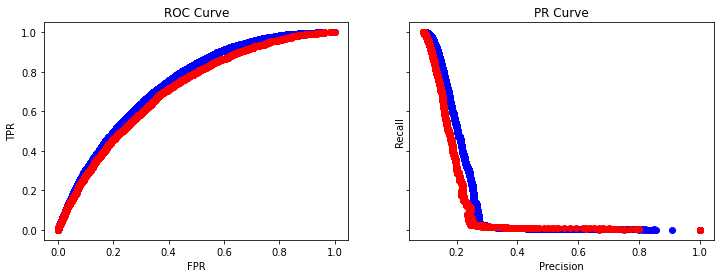

In [74]:
# Define weights for unbalanced classes

class_weight = {0: 1., 1: 30.}
clf=linear_model.LogisticRegression(class_weight=class_weight)
train_model(clf, X_train, y_train)
evaluate(clf, X_train, y_train, X_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time elapsed(Training: 27.3367 s
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy (Training): 0.906134
ROCAUC Score (Training): 0.738983
Accuracy (Validation): 0.911306
ROCAUC Score (Validation): 0.709131
Time elapsed (Evaluation): 0.7827 s


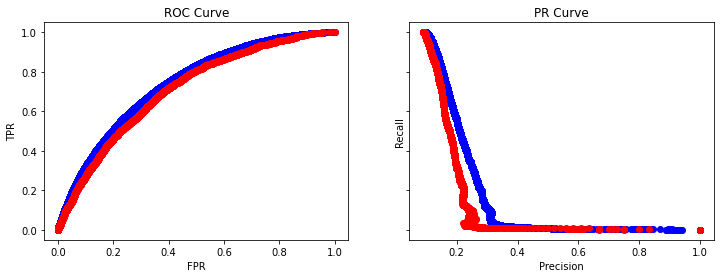

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time elapsed(Training: 27.4082 s
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy (Training): 0.906207
ROCAUC Score (Training): 0.738391
Accuracy (Validation): 0.912013
ROCAUC Score (Validation): 0.709739
Time elapsed (Evaluation): 0.7779 s


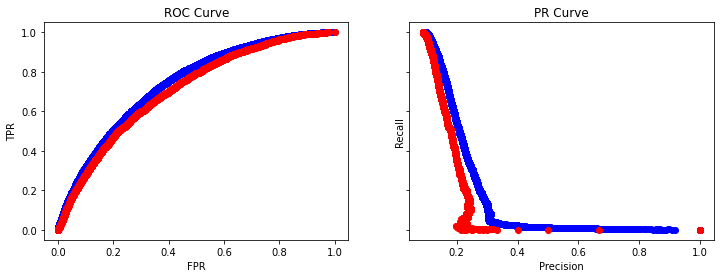

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time elapsed(Training: 27.3814 s
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy (Training): 0.908150
ROCAUC Score (Training): 0.737592
Accuracy (Validation): 0.902816
ROCAUC Score (Validation): 0.710214
Time elapsed (Evaluation): 0.7804 s


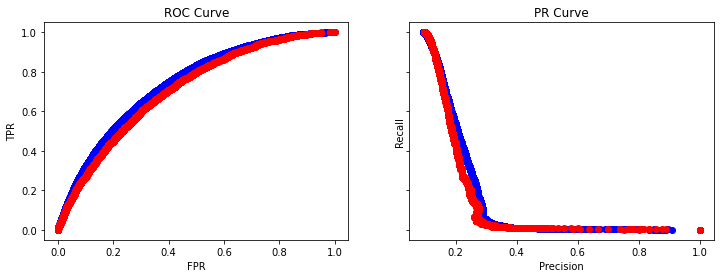

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time elapsed(Training: 28.0268 s
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy (Training): 0.907190
ROCAUC Score (Training): 0.738457
Accuracy (Validation): 0.907177
ROCAUC Score (Validation): 0.710000
Time elapsed (Evaluation): 0.7847 s


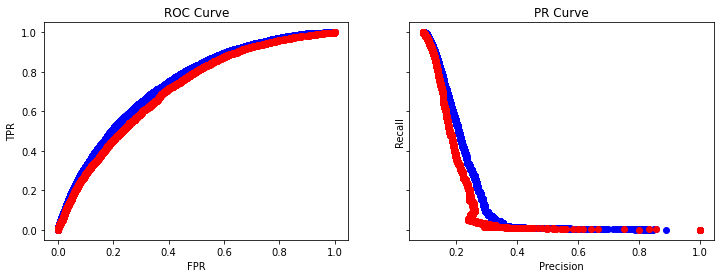

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time elapsed(Training: 25.0927 s
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy (Training): 0.908933
ROCAUC Score (Training): 0.736286
Accuracy (Validation): 0.900493
ROCAUC Score (Validation): 0.722707
Time elapsed (Evaluation): 0.7502 s


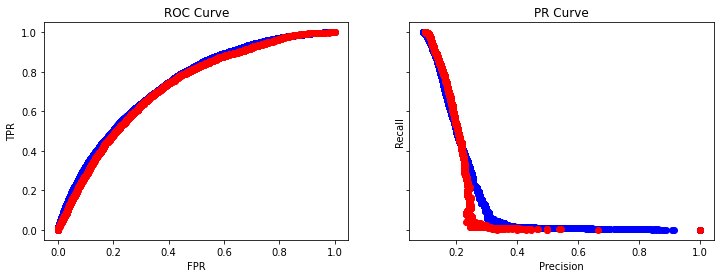

In [75]:
for train_index, valid_index in kf.split(X):
    X_train, X_valid = X.iloc[train_index, :], X.iloc[valid_index, :]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    clf=linear_model.LogisticRegression()
    train_model(clf, X_train, y_train)
    evaluate(clf, X_train, y_train, X_valid, y_valid)